In [1]:
import numpy as np
import pandas as pd
import Strategies 
import Strategy_Analysis_Tool 
from binance.client import Client
from matplotlib import pyplot as plt

In [2]:
# Get data
symbol = "BTCUSDT"
timeFrame = "1m"
startDate = "2022-07-21"
endDate = "2022-07-22"
client = Client()
bars = client.get_historical_klines(symbol=symbol,interval=timeFrame,start_str=startDate, end_str = endDate)
df = pd.DataFrame(bars[:],columns=["timestamp","open","high","low","close","volume", "close_time", "quote_asset_volume", "number_of_trade", "TBB", "TBQ", "ignore"])
df["date"]=pd.to_datetime(df["timestamp"],unit="ms").astype(str)
df = df.drop(["timestamp", "close_time", "quote_asset_volume", "number_of_trade", "TBB", "TBQ", "ignore"], axis=1)
df["open"] = pd.to_numeric(df["open"])
df["high"] = pd.to_numeric(df["high"])
df["low"] = pd.to_numeric(df["low"])
df["close"] = pd.to_numeric(df["close"])
df["volume"] = pd.to_numeric(df["volume"])
df

,open,high,low,close,volume,date
0,23223.30,23241.80,23200.00,23232.33,180.74421,2022-07-21 00:00:00
1,23232.33,23261.82,23227.56,23236.17,110.18477,2022-07-21 00:01:00
2,23236.17,23280.21,23233.38,23261.54,172.32926,2022-07-21 00:02:00
3,23259.78,23286.57,23218.01,23271.81,138.26680,2022-07-21 00:03:00
4,23271.81,23313.21,23268.86,23295.74,208.49995,2022-07-21 00:04:00
...,...,...,...,...,...,...
1436,23172.45,23196.55,23164.88,23194.21,44.79838,2022-07-21 23:56:00
1437,23195.78,23196.27,23139.19,23148.07,76.89571,2022-07-21 23:57:00
1438,23151.54,23152.29,23133.03,23134.86,62.04912,2022-07-21 23:58:00
1439,23136.72,23161.46,23133.46,23152.19,44.86196,2022-07-21 23:59:00


In [3]:
# Grid strategy
grid_parameters = {
    "name":"grid",                                    ## str
    "start_money" : 1000.0,                           ## float    
    "start_storage" : 0.0,                            ## float
    "trading_fee_rate" : 0.002,                       ## float
    "buy_unit" : 0.0001,                              ## float
    "grid_number" : 50,                               ## int  
    "equal_Diff_or_Ratio" : "DIFF",                   ## "DIFF", "RATIO"
    "trading_logistic":"both",                        ## "long", "short", "both"
    "initial_setup":{"type":"None", "protion":0.0},   ## "type": "long", "short" | "None". "portion" : float
    "lowest_price" : 18000.0,                         ## float
    "highest_price" : 24000.0                         ## float
}
myGrid = Strategies.Grid(grid_parameters)
# Buy and hold
buy_and_hold_parameters = {
    "name":"buy and hold",                            ## str
    "start_money" : 1000.0,                           ## float    
    "start_storage" : 0.0,                            ## float
    "trading_fee_rate" : 0.002,                       ## float
    "buy_unit" : 0.0001,                              ## float
}
buy_and_hodl = Strategies.Buy_and_Hold(buy_and_hold_parameters)

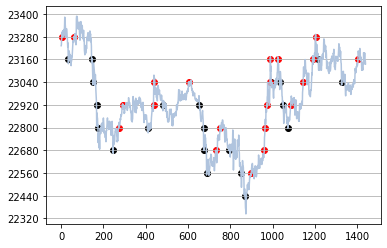

strategy: grid , trading count: 42 , profit: 0.0007063019999988 , sharpe ratio: -376.6503032887417


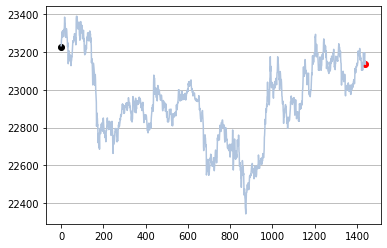

strategy: buy and hold , trading count: 2 , profit: -0.0037216932994019064 , sharpe ratio: -2.0029940745488433


In [4]:
profit, trading_count, buy_record, sell_record = myGrid.back_test(df)
sharpe_ratio = Strategy_Analysis_Tool.Analysis_tool.Shape_Ratio(myGrid, df, 0.02, window_size=100, window_off=100)
print("strategy:", myGrid.name, ", trading count:", trading_count, ", profit:", profit, ", sharpe ratio:", sharpe_ratio)

profit, trading_count, buy_record, sell_record = buy_and_hodl.back_test(df)
sharpe_ratio = Strategy_Analysis_Tool.Analysis_tool.Shape_Ratio(buy_and_hodl, df, 0.02, window_size=100, window_off=100)
print("strategy:", buy_and_hodl.name, ", trading count:", trading_count, ", profit:", profit, ", sharpe ratio:", sharpe_ratio)

*-------------Initial State-------------*
| >> strategy: buy and hold
| >> money: 1000.0
| >> storage: 0.0
| >> guarantee money: None
| >> trading count: 0
| Total value: 1000.0
| Profit: 0.0
| Current price: 0
| Time: 2022-08-13 18:23:36.241301

*---------------------------------------*
| >> strategy: buy and hold
| >> money: 0.0
| >> storage: 0.04086641708183541
| >> guarantee money: None
| >> trading count: 1
| Total value: 1000.0
| Profit: 0.0
| Current price: 24469.97
| Time: 2022-08-13 18:23:36.284953

*---------------------------------------*
| >> strategy: buy and hold
| >> money: 999.727829662235
| >> storage: 0.0
| >> guarantee money: None
| >> trading count: 2
| Total value: 999.727829662235
| Profit: -0.00027217033776503287
| Current price: 24463.31
| Time: 2022-08-13 18:23:46.781952



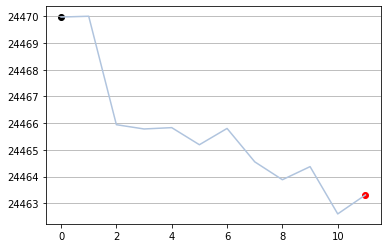

In [5]:
buy_and_hodl.intime_test("BTCUSDT", "00:00:01,000", "00:00:10,000")

*-------------Initial State-------------*
| >> strategy: grid
| >> money: 1000.0
| >> storage: 0.0
| >> guarantee money: 1000.0
| >> trading count: 0
| Total value: 1000.0
| Profit: 0.0
| Current price: 24463.73
| Time: 2022-08-13 18:23:47.129343

*---------------------------------------*
| >> strategy: grid
| >> money: 997.5487072
| >> storage: 0.0001
| >> guarantee money: 997.5487072
| >> trading count: 1
| Total value: 999.9951082
| Profit: -4.891799999995783e-06
| Current price: 24464.01
| Time: 2022-08-13 18:23:48.189400

*---------------------------------------*
| >> strategy: grid
| >> money: 995.0973809999999
| >> storage: 0.0002
| >> guarantee money: 995.0973809999999
| >> trading count: 2
| Total value: 999.9905769999999
| Profit: -9.423000000083447e-06
| Current price: 24465.98
| Time: 2022-08-13 18:23:49.232059

*---------------------------------------*
| >> strategy: grid
| >> money: 992.6460213999999
| >> storage: 0.00030000000000000003
| >> guarantee money: 992.646021399

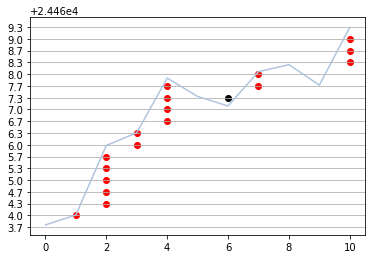

In [6]:
# Grid strategy
grid_parameters = {
    "name":"grid",                                    ## str
    "start_money" : 1000.0,                           ## float    
    "start_storage" : 0.0,                            ## float
    "trading_fee_rate" : 0.002,                       ## float
    "buy_unit" : 0.0001,                              ## float
    "grid_number" : 600,                              ## int  
    "equal_Diff_or_Ratio" : "DIFF",                   ## "DIFF", "RATIO"
    "trading_logistic":"both",                        ## "long", "short", "both"
    "initial_setup":{"type":"None", "protion":0.0},   ## "type": "long", "short" | "None". "portion" : float
    "lowest_price" : 24300,                           ## float
    "highest_price" : 24500.0                         ## float
}
myGrid = Strategies.Grid(grid_parameters)
myGrid.intime_test("BTCUSDT", "00:00:01,000", "00:00:10,000")
